In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv
/kaggle/input/image1/Screenshot 2025-06-07 105925.png


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Main Objective- to learn kearas

In [4]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# EDA

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


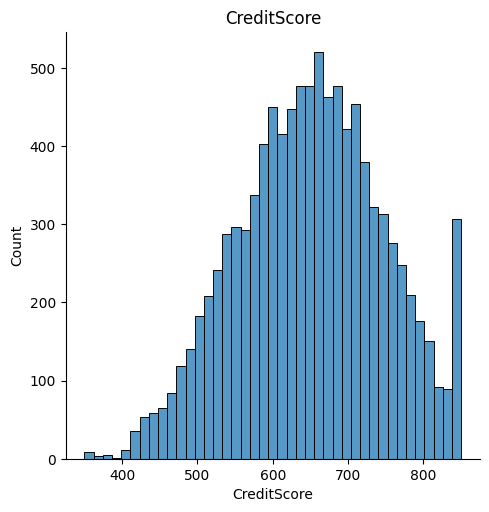

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


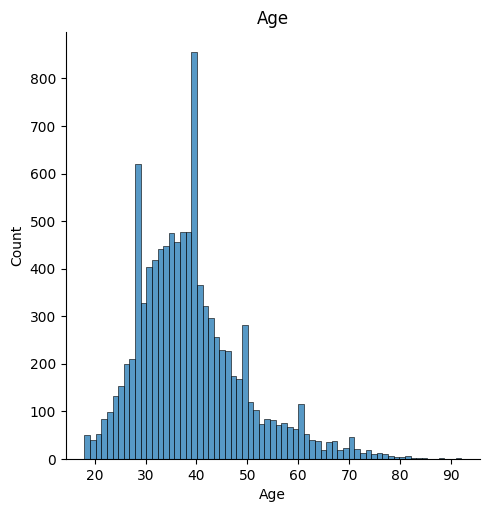

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


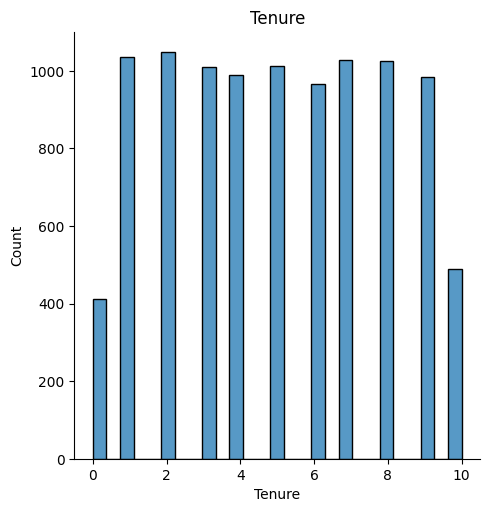

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


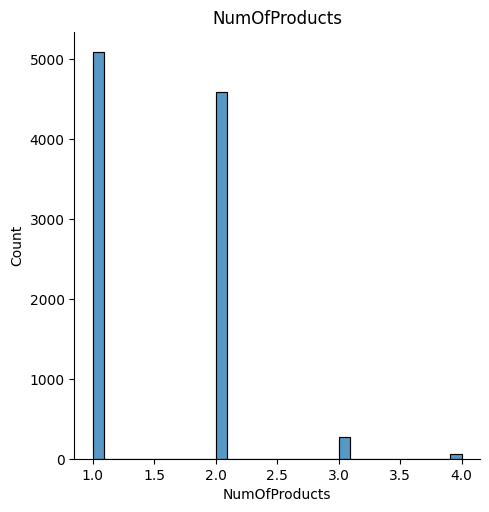

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


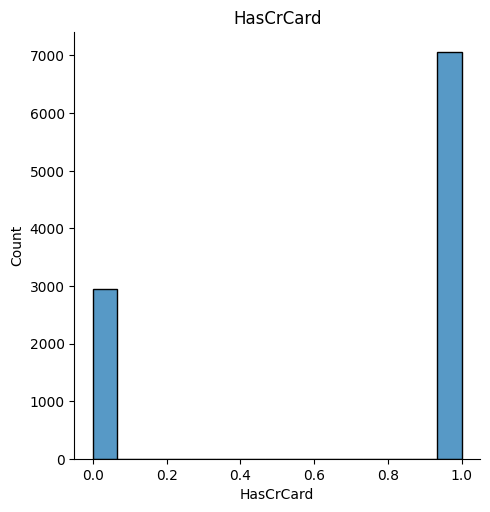

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


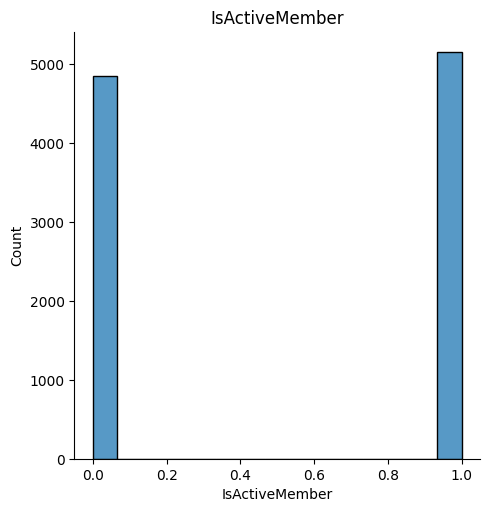

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


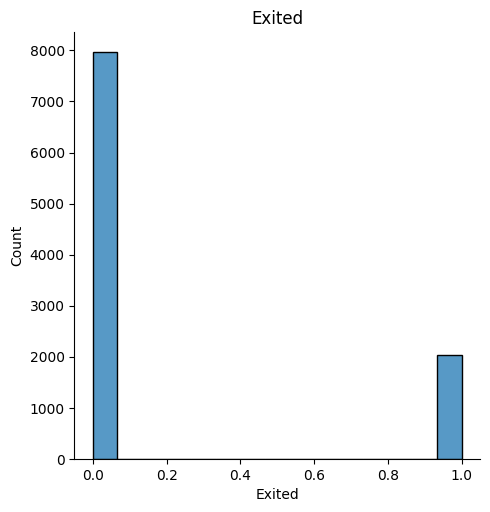

In [9]:
for column in df.select_dtypes(include=int).columns:
    sns.displot(data=df,x=column)
    plt.title(column)
    plt.show()

In [10]:
# One Hot Encoding
df=pd.get_dummies(df, columns=['Geography','Gender'],drop_first=True,dtype=int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
X_train.shape

(8000, 11)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-06-07 08:02:47.110066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749283367.320116      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749283367.386491      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
# Creating a Sequential model with 1 hidden layer(3 nodes ) and 1 out put layer
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-07 08:02:59.377620: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


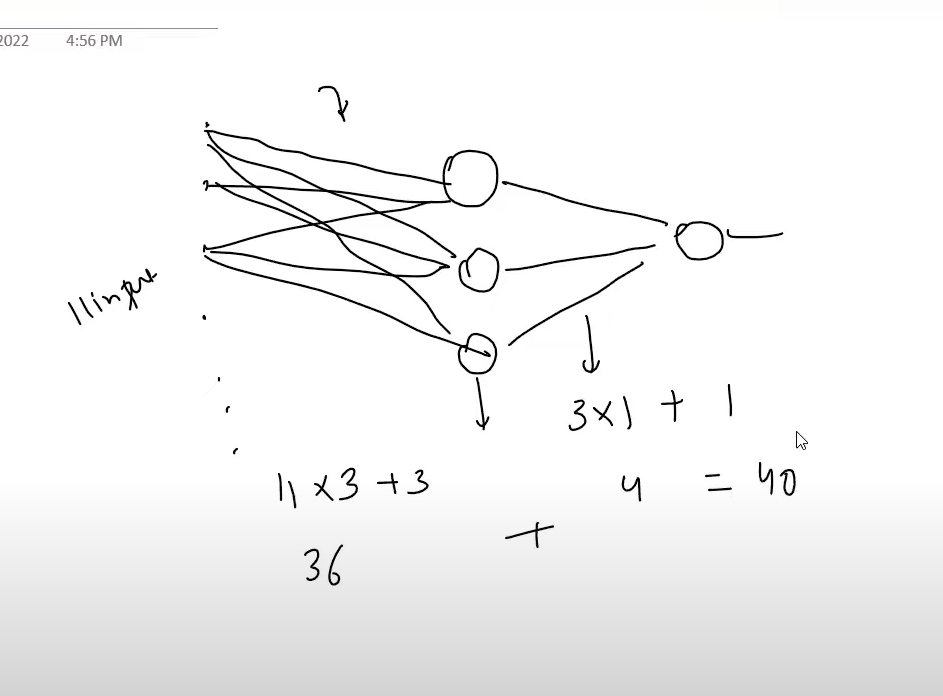

In [17]:
from PIL import Image
from IPython.display import display

img_path = '/kaggle/input/image1/Screenshot 2025-06-07 105925.png'
img = Image.open(img_path)
display(img)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [20]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.1,verbose=1)
# validation_split helps removing another 20% data from taining data and calculate error on 

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5961 - val_loss: 0.5100
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4645 - val_loss: 0.4716
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4230 - val_loss: 0.4508
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4006 - val_loss: 0.4322
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3888 - val_loss: 0.4197
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3574 - val_loss: 0.4012
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3477 - val_loss: 0.3949
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3476 - val_loss: 0.3903
Epoch 9/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3440 - val_loss: 0.3859
Epoch 10/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3336 - val_loss: 0.3832
Epoch 11/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3336 - val_loss: 0.3816
Epoch 12/100
225/225 ━━━━━━━━━━━━━━━━━━━━

In [21]:
# Calculating weights and baises

In [22]:
model.layers[0].get_weights()


[array([[ 0.47386214, -0.02429593, -0.11556731, -0.2649852 , -0.14591433,
          0.00319637,  0.14738677, -0.0747223 , -0.17116341,  0.29845336,
          0.07455763],
        [ 0.8261494 , -0.48678797, -0.5172933 ,  0.9928354 , -0.11229825,
          0.44802573, -0.11350354,  0.06820787, -0.35375842,  0.01310836,
          0.8420587 ],
        [ 0.21286358, -0.11321954, -0.09570778, -0.08668631, -0.49156323,
          0.26355702,  0.21721019, -0.33048096, -0.07678486, -0.22832356,
         -0.11237191],
        [-0.00348927, -1.0731704 , -0.4697507 , -0.1979809 ,  0.73661906,
         -0.18982857, -0.7087997 , -0.3899866 ,  0.59706783, -0.22914107,
         -0.03418172],
        [-0.6327116 , -0.55812854,  0.40460128, -0.605262  , -0.1681783 ,
          0.02893758,  0.02819965,  0.22640626,  1.4670869 ,  0.3948127 ,
          0.98749727],
        [-0.22248788,  0.1275268 ,  0.45684195,  0.00601881,  0.10485934,
          0.07919379, -0.3770784 ,  0.12162872, -0.24585798, -0.3777797

In [23]:
# plotting AUC Curve for obtaining threshold value

In [34]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step


In [35]:
y_pred=np.where(y_log>0.5,1,0)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.86

In [37]:
history.history
# loss and accuracy 

{'loss': [0.5365764498710632,
  0.45162078738212585,
  0.4151947796344757,
  0.39656972885131836,
  0.3803083598613739,
  0.3656339645385742,
  0.3553137481212616,
  0.34810200333595276,
  0.3433028757572174,
  0.3402250409126282,
  0.33813005685806274,
  0.3366505801677704,
  0.3350546658039093,
  0.3338505029678345,
  0.3329625129699707,
  0.3315287232398987,
  0.3311014175415039,
  0.3302602767944336,
  0.32948967814445496,
  0.3285733163356781,
  0.3290018141269684,
  0.3275190591812134,
  0.32793840765953064,
  0.3270704448223114,
  0.3266465961933136,
  0.3261033594608307,
  0.3255130648612976,
  0.3251431882381439,
  0.3245832622051239,
  0.3248922526836395,
  0.3247043490409851,
  0.3241637647151947,
  0.323543906211853,
  0.3236006796360016,
  0.3234301209449768,
  0.3227815628051758,
  0.3228074014186859,
  0.32280927896499634,
  0.3221570551395416,
  0.3220026195049286,
  0.32137832045555115,
  0.3215251863002777,
  0.32099616527557373,
  0.3207252323627472,
  0.321102857589

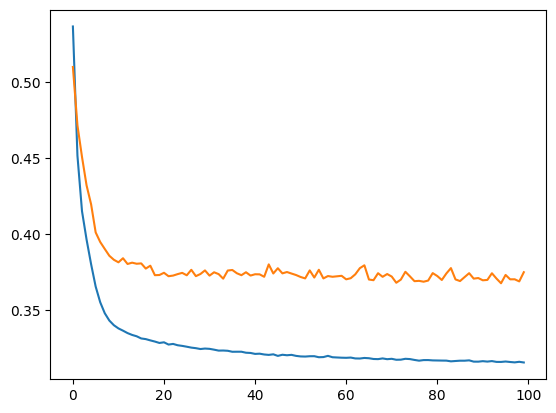

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

KeyError: 'accuracy'